In [1]:
from models.VGG16 import VGG16
import tensorflow as tf
keras = tf.keras

In [2]:
VGG16_model = VGG16().getModel()

In [3]:
VGG16_model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
                    loss=keras.losses.categorical_crossentropy,
                    metrics=['accuracy'])

In [4]:
VGG16_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
Conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
Conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
Conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
Conv3_1 (Conv2D)             (None, 56, 56, 256)       2

In [5]:
test_input = tf.ones((10, 224, 224, 3), dtype=tf.dtypes.float32, name=None)
result = VGG16_model(test_input)
print(result[0])

tf.Tensor([0.49932948 0.50067055], shape=(2,), dtype=float32)


In [6]:
# load dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "C:/Users/antho/Documents/GitHub/data/DB/train/",
      image_size=(224, 224),
      batch_size=32,
      label_mode= "categorical")

Found 3846 files belonging to 2 classes.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "C:/Users/antho/Documents/GitHub/data/DB/val/",
      image_size=(224, 224),
      batch_size=32,
      label_mode= "categorical")

Found 3827 files belonging to 2 classes.


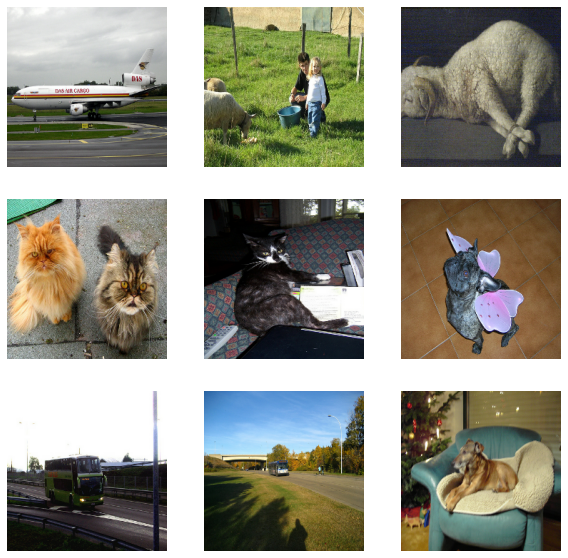

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32, 2)


In [10]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [11]:
import numpy as np
normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [12]:
normalized_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_val_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

9.958605e-05 1.0


In [13]:
#train model
VGG16_model.fit(normalized_train_ds, validation_data=normalized_val_ds, epochs=2)

Epoch 1/2
121/121 [==============================] - 74s 607ms/step - loss: 0.7216 - accuracy: 0.5556 - val_loss: 0.6869 - val_accuracy: 0.5574
Epoch 2/2
121/121 [==============================] - 71s 587ms/step - loss: 0.6873 - accuracy: 0.5562 - val_loss: 0.6867 - val_accuracy: 0.5574
